In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.cluster import KMeans

In [2]:
def peel_first_col(fname, fcol, delimiter=None):
    with open(fname, 'r') as fin:
        for line in fin:
            try:
                fcol.append(line.split(delimiter, 1)[0])
                yield line.split(delimiter, 1)[1]
            except IndexError:
                continue

In [3]:
symMats = []
col=[]
for f in ["PoAV","Po2P","PoPN","PQAV","PQ2P","PQPN"]:
    col = []
    klDiv = np.loadtxt(peel_first_col("../../output/"+f+"_5.matrix", col), skiprows=1)
    col.pop(0)
    klDiv = np.absolute(klDiv)
    symKlDiv = np.triu(klDiv)+np.tril(klDiv).T
    print(f)
    print(symKlDiv)
    print(col)
    print()
    symMats = symMats + [symKlDiv]
    col = col
print(symMats)

PoAV
[[  0.     123.0758  13.3431 144.9391]
 [  0.       0.     121.8927 164.1554]
 [  0.       0.       0.     150.2047]
 [  0.       0.       0.       0.    ]]
['m_1540.fasta.motif.h1_2.h1_4.h1_3_chr5.sto.cm', 'm_1930.fasta.motif.h2_1.h2_2.h1_3_chr5.sto.cm', 'm_1539.fasta.motif.h2_2.h2_3_chr5.sto.cm', 'm_1579.fasta.motif.h2_1.h2_3_chr5.sto.cm']

Po2P
[[  0.         205.805068    16.47372123 216.60273606]
 [  0.           0.         196.71233521 242.58620081]
 [  0.           0.           0.         243.72022356]
 [  0.           0.           0.           0.        ]]
['m_1540.fasta.motif.h1_2.h1_4.h1_3_chr5.sto.cm', 'm_1930.fasta.motif.h2_1.h2_2.h1_3_chr5.sto.cm', 'm_1539.fasta.motif.h2_2.h2_3_chr5.sto.cm', 'm_1579.fasta.motif.h2_1.h2_3_chr5.sto.cm']

PoPN
[[  0.         148.38628872   7.69584654 178.00629893]
 [  0.           0.         128.79541264 214.5471225 ]
 [  0.           0.           0.         163.48387572]
 [  0.           0.           0.           0.        ]]
['m_1540.f

In [4]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(symMats[0])
print(symMats[0])
print(clustering.labels_)

[[  0.     123.0758  13.3431 144.9391]
 [  0.       0.     121.8927 164.1554]
 [  0.       0.       0.     150.2047]
 [  0.       0.       0.       0.    ]]
[2 0 0 1]


[(0, {'label': 'm_1540.fasta.motif.h1_2.h1_4.h1_3_chr5.sto.cm'}), (1, {'label': 'm_1930.fasta.motif.h2_1.h2_2.h1_3_chr5.sto.cm'}), (2, {'label': 'm_1539.fasta.motif.h2_2.h2_3_chr5.sto.cm'}), (3, {'label': 'm_1579.fasta.motif.h2_1.h2_3_chr5.sto.cm'})]


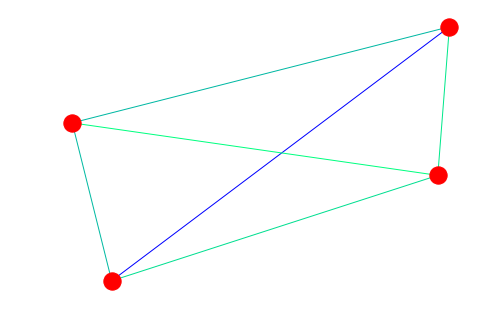

In [17]:
import networkx as nx
import string

G = nx.from_numpy_matrix(symMats[0])
for i in range(len(col)):
    G.node[i]['label'] = col[i]
print(G.nodes(data=True))

nx.write_gexf(G,"../../output/graph.gexf")

nx.draw(G,edge_color = [ i[2]['weight'] for i in G.edges(data=True) ], edge_cmap=plt.cm.winter )